# Q-Score

In [20]:
%load_ext autoreload
%autoreload 2

from iqm.benchmarks.coherence.coherence import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Choose (or define) a backend

In [51]:
from iqm.qiskit_iqm import IQMProvider
from qiskit import QuantumCircuit
import numpy as np
import os
from iqm.benchmarks.readout_mitigation import apply_readout_error_mitigation

In [52]:
# Input your Resonance token
token = "XXXXXXXXX-XXXX-XXXX-XXXX-XXXXXXXXXXXX"  # Replace with your actual token
os.environ["IQM_TOKEN"] = token

QPU = "sirius"  # Options for the crystal QPUs are: garnet, pyrite, emerald

if QPU == "emerald":
    iqm_server_url = 'https://cocos.resonance.meetiqm.com/' + QPU + ":timeslot"
else:
    iqm_server_url = 'https://cocos.resonance.meetiqm.com/' + QPU

provider = IQMProvider(iqm_server_url)
backend = provider.get_backend()

/opt/anaconda3/envs/iqm-benchmarks/lib/python3.11/site-packages/iqm/iqm_client/iqm_client.py:142: UserWarning: Your IQM Client version 27.1.0 was built for a different version of IQM Server. You might encounter issues. For the best experience, consider using a version of IQM Client that satisfies 29.2.0 <= iqm-client < 30.0.
  warnings.warn(version_incompatibility_msg)


## Set IQM Token if using Resonance.

## Qscore Configuration

In [53]:
EXAMPLE_T1 = CoherenceConfiguration(
    delays = list(np.linspace(0, 100e-6, 150)),
    qiskit_optim_level = 3,
    optimize_sqg = True,
    coherence_exp = "t1",
    qubits_to_plot=list(range(backend.num_qubits)),
    )

## Run the experiment

In [54]:
benchmark_t1 = CoherenceBenchmark(backend, EXAMPLE_T1)
run0_t1 = benchmark_t1.run()
result = benchmark_t1.analyze()

/opt/anaconda3/envs/iqm-benchmarks/lib/python3.11/site-packages/iqm/qiskit_iqm/iqm_provider.py:171: UserWarning: Unknown backend option(s): {'calibration_set_id': None}
  warnings.warn(f"Unknown backend option(s): {unknown_options}")
2025-07-11 10:17:55,906 - iqm.benchmarks.logging_config - INFO - Retrieving all counts


## Perform Analysis

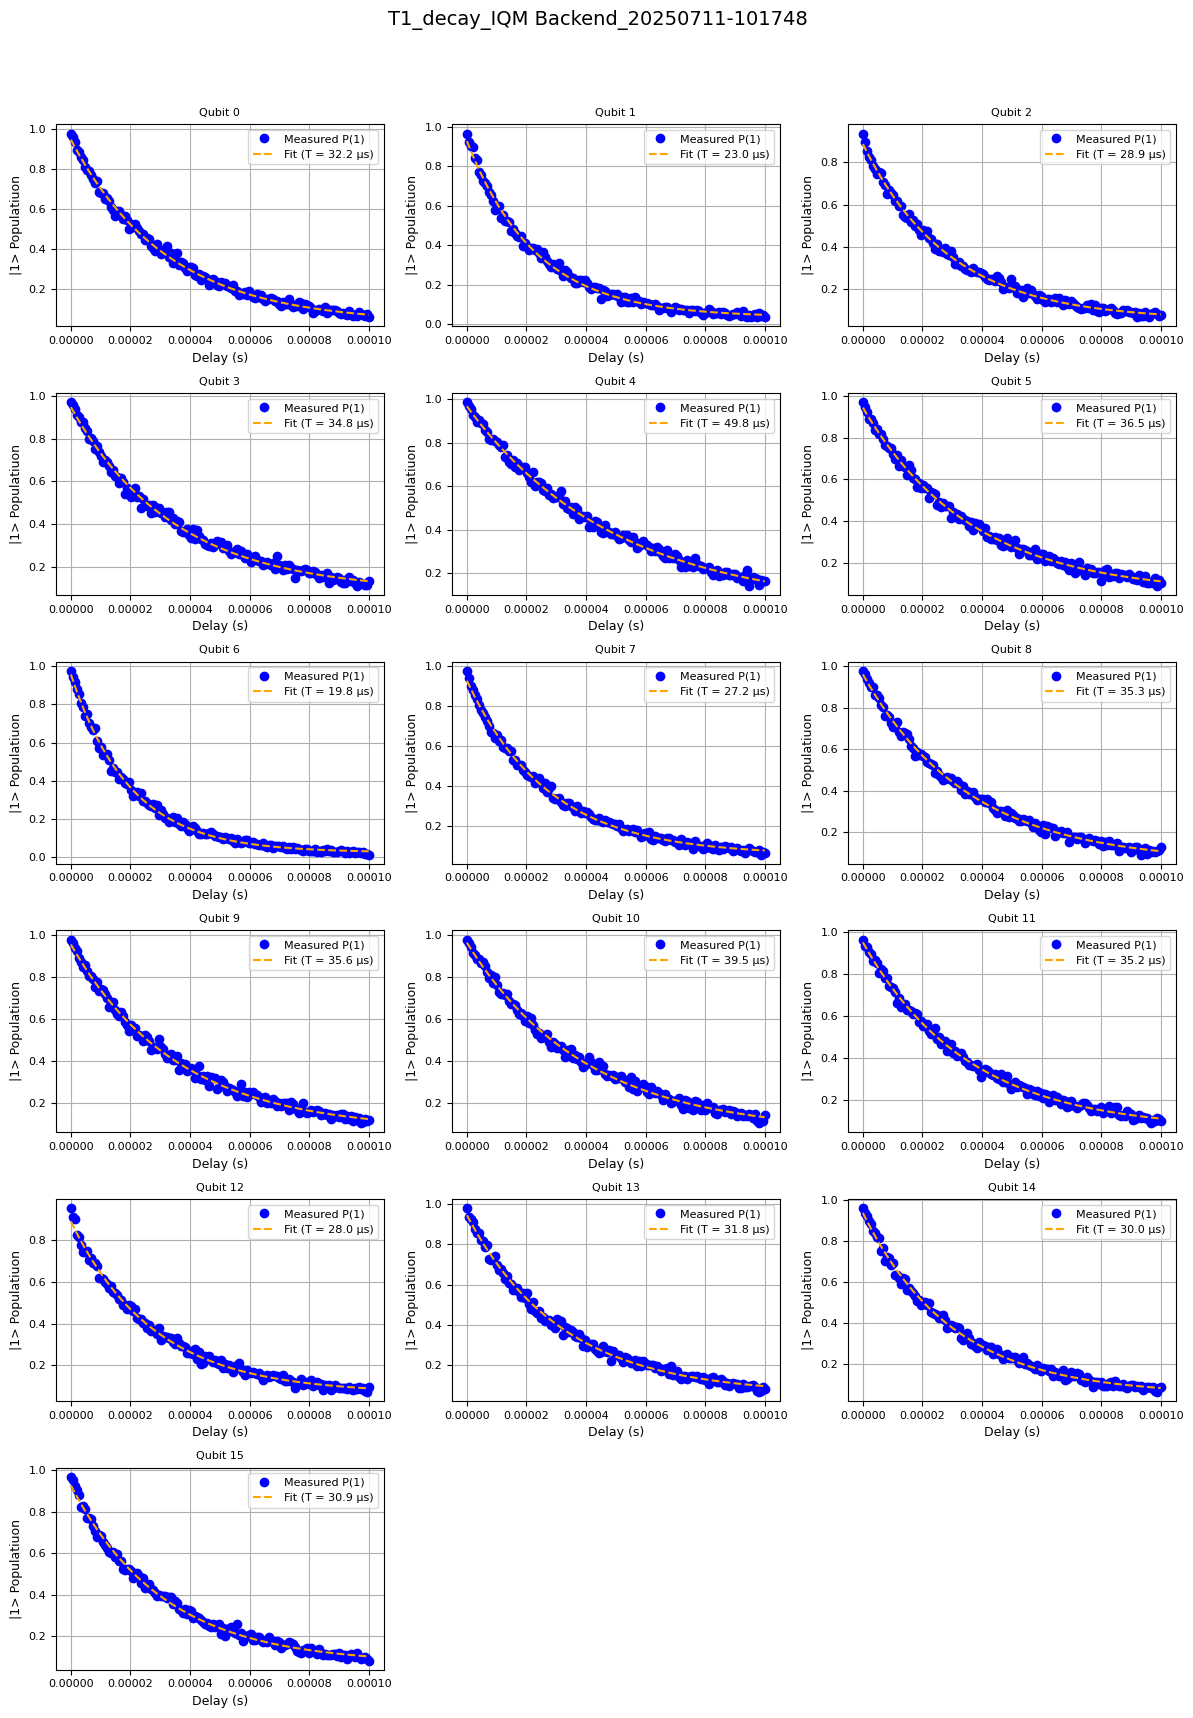

In [55]:
result.plot_all()

In [36]:
result.observations

[BenchmarkObservation(name='T1', value=0.7121995997113231, identifier=BenchmarkObservationIdentifier(qubit_indices=2), uncertainty=None),
 BenchmarkObservation(name='T1', value=0.1534185228462246, identifier=BenchmarkObservationIdentifier(qubit_indices=0), uncertainty=None),
 BenchmarkObservation(name='T1', value=3.00378955581075e-05, identifier=BenchmarkObservationIdentifier(qubit_indices=1), uncertainty=None),
 BenchmarkObservation(name='T1', value=0.19928675980671856, identifier=BenchmarkObservationIdentifier(qubit_indices=3), uncertainty=None),
 BenchmarkObservation(name='T1', value=0.3950418173360414, identifier=BenchmarkObservationIdentifier(qubit_indices=4), uncertainty=None)]

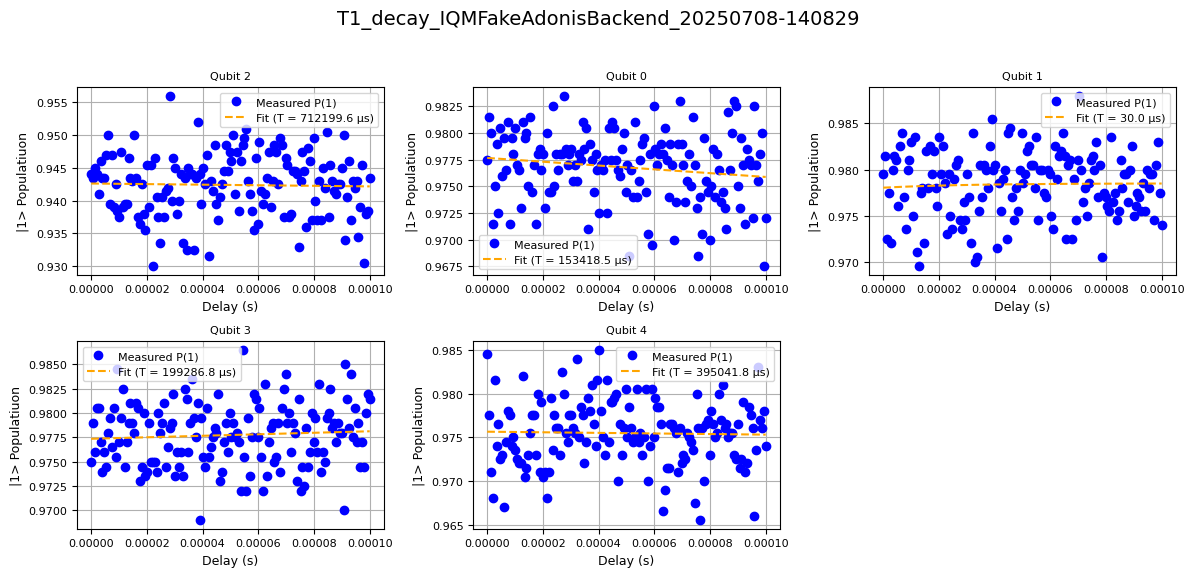

In [35]:
result.plot_all()